In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle 
import bokeh

## Загрузка и знакомство с данными 

In [20]:
df = pd.read_csv('/Users/markantimonov/Desktop/my_proj/data/car data.csv')
display(df.head(10))

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Очистка данных 

In [21]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [22]:
df ['Car_Name'] = df[ 'Car_Name' ].astype('category')
df ['Fuel_Type'] = df ['Fuel_Type'] .astype('category')
df ['Transmission'] = df[ 'Transmission' ].astype( 'category')
df[ 'Selling_type'] = df[ 'Selling_type'].astype('category')

In [23]:
df['Year']= df['Year'].astype('int16')
df['Selling_Price'] = df[ 'Selling_Price'].astype('float16')
df['Present_Price'] = df[ 'Present_Price'].astype('float16')
df['Owner'] = df['Owner'].astype('int8')

In [24]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [25]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [26]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

Car_Name - numer of unique = 98
Fuel_Type - numer of unique = 3
Selling_type - numer of unique = 2
Transmission - numer of unique = 2


In [27]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')
    

Unique categories in Car_Name: Car_Name
city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Hero Passion X pro         1
Hero Hunk                  1
camry                      1
Hero Honda Passion Pro     1
800                        1
Name: count, Length: 98, dtype: int64
Unique categories in Fuel_Type: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Unique categories in Selling_type: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Unique categories in Transmission: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


## Очистка данных 

По полученным данным можно сделать вывод, что очищать данные не стоит. df.describe() показал, что все данные валидны

## Анализ признаков для модели

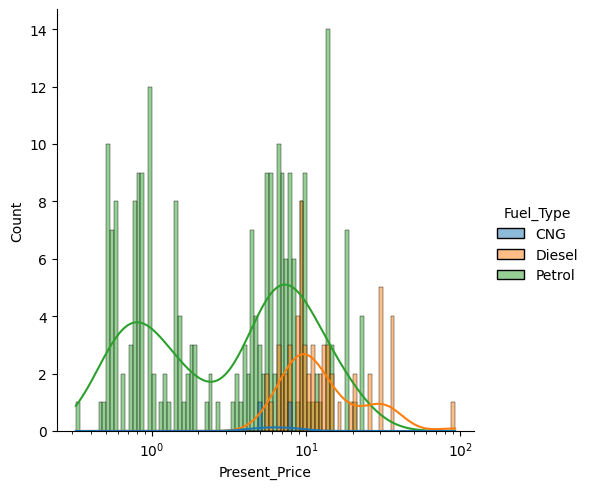

In [28]:
sns.displot(df, x='Present_Price', bins=100, hue='Fuel_Type', kde=True, log_scale=True)

Гистограмма с линией плотности показывает распределение цен на автомобили (Present_Price) в логарифмическом масштабе, где основная масса значений сосредоточена в диапазоне от 1 до 10. Данные имеют мультимодальное распределение с несколькими пиками, что указывает на наличие различных ценовых групп. Распределение также скошено вправо, что говорит о наличии нескольких высоких значений цены, выходящих за основной диапазон.

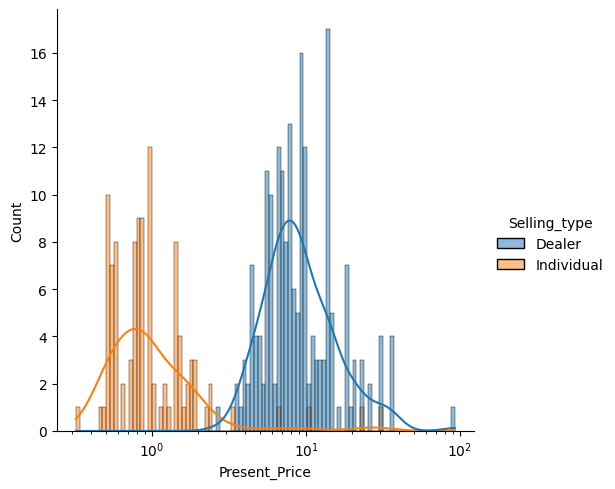

In [29]:
sns.displot(df, x='Present_Price', bins=100, hue='Selling_type', kde=True, log_scale=True)

На изображении представлена гистограмма с наложенными линиями плотности для переменной Present_Price, разделённая по двум категориям: Dealer (продавец-дилер) и Individual (частный продавец). Вот основные наблюдения и выводы:

* Для Dealer (обозначено синим цветом) видно, что цены сосредоточены в диапазоне от 10 до 20 в логарифмическом масштабе. Это означает, что дилеры чаще продают товары с более высокой ценой.
* Для Individual (обозначено оранжевым цветом) цены сконцентрированы в диапазоне от 1 до 10 в логарифмическом масштабе. Это указывает на то, что частные продавцы продают товары с более низкой ценой.
* Явное различие в распределении цен между дилерами и частными продавцами. Частные продавцы склонны предлагать товары по более низким ценам, в то время как дилеры чаще продают товары по более высоким ценам.
* Видно, что распределения практически не пересекаются. Это может свидетельствовать о различной аудитории или товарах, которые предлагаются разными типами продавцов.

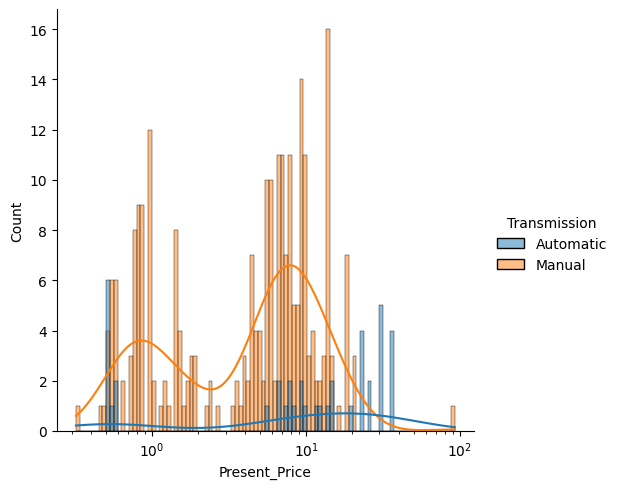

In [30]:
sns.displot(df, x='Present_Price', bins=100, hue='Transmission', kde=True, log_scale=True)

<Axes: >

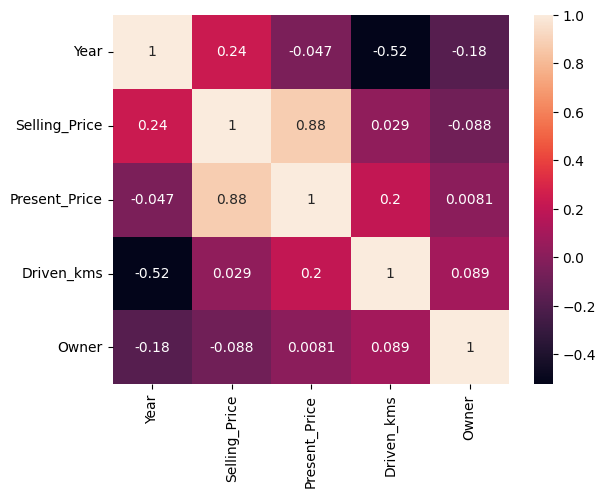

In [31]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

На изображении представлена корреляционная матрица с цветовой шкалой, которая показывает коэффициенты корреляции между различными переменными: Year (год выпуска), Selling_Price (цена продажи), Present_Price (текущая цена), Driven_kms (пробег в километрах) и Owner (владельцы).
* Текущая цена автомобиля (Present_Price) является основным фактором, влияющим на цену его продажи (Selling_Price). Это логично, так как текущая рыночная стоимость напрямую связана с ценой продажи.
*  Количество владельцев практически не влияет на остальные параметры, что может означать, что покупатели больше ориентируются на другие характеристики автомобиля, такие как текущая цена, пробег и возраст.
* Старые автомобили с большим пробегом обычно стоят дешевле, что подтверждается отрицательной корреляцией между Driven_kms и Year.

In [32]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [33]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='Year', y='Present_Price' )
hover = HoverTool(tooltips=[('Selling_type', '@Selling_type'),
                            ('Owner', '@Owner')])

p.add_tools(hover)
show(p)

На изображении представлен точечный график (scatter plot), который отображает связь между двумя переменными: годом выпуска автомобиля и ценой по оси Y.
* Точки, соответствующие разным годам, распределены достаточно равномерно, хотя и с некоторыми периодами более высокой плотности в середине графика (около 2010-2016 годов).
* Большинство значений находится в нижней части графика (до 15), что может указывать на преобладание автомобилей с низкой ценой.
* Видно, что по мере приближения к настоящему времени (2018 год) цены на автомобили начинают снижаться, большинство точек находится ближе к нижней части графика. Это естественное снижение стоимости по мере устаревания автомобилей.

## Сохранение очищенного датасета

In [35]:
df.to_pickle('/Users/markantimonov/Desktop/my_proj/data/clean_car_data.pkl')